# CSCI 6364 ML Homework 3 Submission

**Group Members:**

- Aydin Bagiyev (abagiyev@gwu.edu)
- Narmin Jamalova (njamalova54@gwu.edu)
- Ilyas Karimov (ilyaskarimov@gwu.edu)

## Importing Libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np

pd.set_option("max_columns", None)

## Reading the Data

In [27]:
df_original = pd.read_csv("../datasets/mental-heath-in-tech-2016_20161114.csv")
df_original.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

## Inspecting the Columns

In [28]:
# list all columns available
print(list(df_original.columns))

['Are you self-employed?', 'How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 'Do you think that discussing a mental health disorder with your employer would have negative cons

In [29]:
# print the count of values for each column
for col in df_original.columns:
    print("Column: ", col)
    print(df_original[col].value_counts(dropna=False).to_dict())

Column:  Are you self-employed?
{0: 1146, 1: 287}
Column:  How many employees does your company or organization have?
{'26-100': 292, nan: 287, 'More than 1000': 256, '100-500': 248, '6-25': 210, '500-1000': 80, '1-5': 60}
Column:  Is your employer primarily a tech company/organization?
{1.0: 883, nan: 287, 0.0: 263}
Column:  Is your primary role within your company related to tech/IT?
{nan: 1170, 1.0: 248, 0.0: 15}
Column:  Does your employer provide mental health benefits as part of healthcare coverage?
{'Yes': 531, "I don't know": 319, nan: 287, 'No': 213, 'Not eligible for coverage / N/A': 83}
Column:  Do you know the options for mental health care available under your employer-provided coverage?
{nan: 420, 'No': 354, 'I am not sure': 352, 'Yes': 307}
Column:  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
{'No': 813, nan: 287, 'Yes': 230, "I don't know": 103}
Column:  Does your employer offer r

# 

# Cleaning the Dataset

In [30]:
# copying df for the use
df = df_original.copy()

In [31]:
# ?maybe apply some keyword encoding
# custom generated new column names
generated_column_names = ["self_employed", "employee_number_range", "is_primary_company_tech", "is_primary_role_tech", "is_provided_mental_health_benefits", "is_known_mental_health_care", "has_formally_mental_health_discussed_by_current_emp", "is_mental_health_resource_offered_by_current_emp", "would_anonymity_be_protected_by_current_emp", "how_easy_to_ask_for_medical_leave", "would_discuss_mental_health_disorder_negative_consequences_with_current_emp", "would_discuss_physical_health_disorder_with_current_emp", "would_feel_comfortable_to_discuss_mental_health_with_current_coworker", "would_feel_comfortable_to_discuss_mental_health_with_current_supervisor", "would_mental_health_be_taken_seriously_by_emp", "would_observe_negative_consequences_in_current_coworkers", "has_medical_coverage", "know_local_or_online_resources_for_help", "reveal_disorder_if_diagnosed_or_treated_to_clients_or_business_contact", "affected_negatively_if_reveled_to_client_or_business_contact", "reveal_disorder_if_diagnosed_or_treated_to_coworker_or_employee", "affected_negatively_if_revealed_to_coworker_or_employee", "productivity_affected_by_mental_health", "percentage_of_worktime_affected_by_mental_health", "has_previous_employers", "provided_mental_health_benefits_by_previous_employer", "aware_of_options_provided_by_previous_employer", "has_formally_discussed_mental_health_with_previous_employer", "is_mental_health_resource_offered_by_previous_employer", "would_anonymity_protected_by_previous_employer", "would_discuss_mental_health_disorder_negative_consequences_with_previous_employer", "would_discuss_physical_health_disorder_negative_consequences_with_previous_employer", "would_feel_comfortable_to_discuss_mental_health_with_previous_coworker", "would_feel_comfortable_to_discuss_mental_health_with_previous_supervisor", "would_mental_health_be_taken_seriously_by_previous_employer", "would_observe_negative_consequences_in_previous_coworkers", "would_bring_up_physical_health_issue_in_interview", "physical_health_reason", "would_bring_up_mental_health_issue_in_interview", "mental_health_reason", "would_hurt_career_if_identified_with_mental_health_issue", "would_be_viewed_negatively_if_suffered_with_mental_health_issues", "willingness_to_share_mental_health_issues_with_friends_and_family", "have_seen_bad_response_to_mental_health_issue_now_or_before", "have_other_observations_affected_desire_to_reveal_mental_health_issue", "has_family_history_of_mental_illness", "had_a_mental_disorder_before", "have_a_mental_disorder_now", "if_yes_what_condition_diagnosed", "if_maybe_what_condition_you_believe_you_have", "diagnosed_by_a_medical_professional", "if_diagnosed_so_what_condition", "sought_treatment_from_professional", "would_interfere_with_work_when_treated_effectively", "would_interfere_with_work_when_not_treated_effectively", "age", "gender", "country_of_residence", "usa_state_if_you_live", "country_of_work", "usa_state_if_you_work", "work_position", "do_you_work_remotely"]

# replacing comlumn names
df.set_axis(generated_column_names, axis=1, inplace=True)

In [32]:
# printing dataframe without print() function happen to be more beautiful and easy to read
df.head()

,self_employed,employee_number_range,is_primary_company_tech,is_primary_role_tech,is_provided_mental_health_benefits,is_known_mental_health_care,has_formally_mental_health_discussed_by_current_emp,is_mental_health_resource_offered_by_current_emp,would_anonymity_be_protected_by_current_emp,how_easy_to_ask_for_medical_leave,would_discuss_mental_health_disorder_negative_consequences_with_current_emp,would_discuss_physical_health_disorder_with_current_emp,would_feel_comfortable_to_discuss_mental_health_with_current_coworker,would_feel_comfortable_to_discuss_mental_health_with_current_supervisor,would_mental_health_be_taken_seriously_by_emp,would_observe_negative_consequences_in_current_coworkers,has_medical_coverage,know_local_or_online_resources_for_help,reveal_disorder_if_diagnosed_or_treated_to_clients_or_business_contact,affected_negatively_if_reveled_to_client_or_business_contact,reveal_disorder_if_diagnosed_or_treated_to_coworker_or_employee,affected_negatively_if_revealed_to_coworker_or_employee,productivity_affected_by_mental_health,percentage_of_worktime_affected_by_mental_health,has_previous_employers,provided_mental_health_benefits_by_previous_employer,aware_of_options_provided_by_previous_employer,has_formally_discussed_mental_health_with_previous_employer,is_mental_health_resource_offered_by_previous_employer,would_anonymity_protected_by_previous_employer,would_discuss_mental_health_disorder_negative_consequences_with_previous_employer,would_discuss_physical_health_disorder_negative_consequences_with_previous_employer,would_feel_comfortable_to_discuss_mental_health_with_previous_coworker,would_feel_comfortable_to_discuss_mental_health_with_previous_supervisor,would_mental_health_be_taken_seriously_by_previous_employer,would_observe_negative_consequences_in_previous_coworkers,would_bring_up_physical_health_issue_in_interview,physical_health_reason,would_bring_up_mental_health_issue_in_interview,mental_health_reason,would_hurt_career_if_identified_with_mental_health_issue,would_be_viewed_negatively_if_suffered_with_mental_health_issues,willingness_to_share_mental_health_issues_with_friends_and_family,have_seen_bad_response_to_mental_health_issue_now_or_before,have_other_observations_affected_desire_to_reveal_mental_health_issue,has_family_history_of_mental_illness,had_a_mental_disorder_before,have_a_mental_disorder_now,if_yes_what_condition_diagnosed,if_maybe_what_condition_you_believe_you_have,diagnosed_by_a_medical_professional,if_diagnosed_so_what_condition,sought_treatment_from_professional,would_interfere_with_work_when_treated_effectively,would_interfere_with_work_when_not_treated_effectively,age,gender,country_of_residence,usa_state_if_you_live,country_of_work,usa_state_if_you_work,work_position,do_you_work_remotely
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1

## Ordering Columns by the Number of Missing Data Points

In [61]:
columns_mapped_to_amount_of_NaN = dict(df.isna().sum())

# check which columns have missing data
for k, v in sorted(columns_mapped_to_amount_of_NaN.items(), key=lambda x: x[1], reverse=True):
    print(f"{k.replace('_', ' ')}"," "*(83-len(k)), f"{v}")

affected negatively if reveled to client or business contact                         1289
percentage of worktime affected by mental health                                     1229
is primary role tech                                                                 1170
has medical coverage                                                                 1146
know local or online resources for help                                              1146
reveal disorder if diagnosed or treated to clients or business contact               1146
reveal disorder if diagnosed or treated to coworker or employee                      1146
affected negatively if revealed to coworker or employee                              1146
productivity affected by mental health                                               1146
if maybe what condition you believe you have                                         1111
if yes what condition diagnosed                                                      865
have other 

## Detecting Noisy/Dirty/Unnecessary Columns

In [64]:
# storing columns as keys and proportion of NaN as values
columns_mapped_to_proportion_of_NaN = {}

# map columns to proportion of missing data points
for k, v in columns_mapped_to_amount_of_NaN.items():
    perc_of_nans = v / df.shape[0]
    columns_mapped_to_proportion_of_NaN[k] = perc_of_nans

In [71]:
# visualizing the proportion of NaNs in decreasing order for each column
for k, v in sorted(columns_mapped_to_proportion_of_NaN.items(), key=lambda x: x[1], reverse=True):
    print(f"{k.replace('_', ' ')}"," "*(83-len(k)), f"{round(v, 3)}")

affected negatively if reveled to client or business contact                         0.9
percentage of worktime affected by mental health                                     0.858
is primary role tech                                                                 0.816
has medical coverage                                                                 0.8
know local or online resources for help                                              0.8
reveal disorder if diagnosed or treated to clients or business contact               0.8
reveal disorder if diagnosed or treated to coworker or employee                      0.8
affected negatively if revealed to coworker or employee                              0.8
productivity affected by mental health                                               0.8
if maybe what condition you believe you have                                         0.775
if yes what condition diagnosed                                                      0.604
have other ob

<BarContainer object of 63 artists>

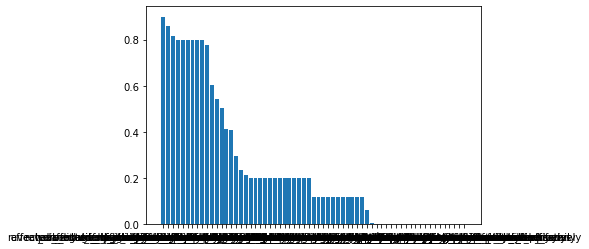

In [96]:
data = {k:v for k, v in sorted(columns_mapped_to_proportion_of_NaN.items(), key=lambda x: x[1], reverse=True)}
plt.bar(data.keys(), height=data.values())

## Dropping Noisy/Dirty/Unnecessary

In [62]:
THRESHOLD = 0.5

In [72]:
# dropping columns where proportion of the missing data points is more than half of observations
for k, v in columns_mapped_to_proportion_of_NaN.items():
    if v >= THRESHOLD:
        df = df.drop(k, axis=1)

In [81]:
# number of dropped columns
print("Dropped Columns Number: %d" % (len(df_original.columns) - len(df.columns)))

# viewing dataframe after modification
df.head()

Dropped Columns Number: 13


,self_employed,employee_number_range,is_primary_company_tech,is_provided_mental_health_benefits,is_known_mental_health_care,has_formally_mental_health_discussed_by_current_emp,is_mental_health_resource_offered_by_current_emp,would_anonymity_be_protected_by_current_emp,how_easy_to_ask_for_medical_leave,would_discuss_mental_health_disorder_negative_consequences_with_current_emp,would_discuss_physical_health_disorder_with_current_emp,would_feel_comfortable_to_discuss_mental_health_with_current_coworker,would_feel_comfortable_to_discuss_mental_health_with_current_supervisor,would_mental_health_be_taken_seriously_by_emp,would_observe_negative_consequences_in_current_coworkers,has_previous_employers,provided_mental_health_benefits_by_previous_employer,aware_of_options_provided_by_previous_employer,has_formally_discussed_mental_health_with_previous_employer,is_mental_health_resource_offered_by_previous_employer,would_anonymity_protected_by_previous_employer,would_discuss_mental_health_disorder_negative_consequences_with_previous_employer,would_discuss_physical_health_disorder_negative_consequences_with_previous_employer,would_feel_comfortable_to_discuss_mental_health_with_previous_coworker,would_feel_comfortable_to_discuss_mental_health_with_previous_supervisor,would_mental_health_be_taken_seriously_by_previous_employer,would_observe_negative_consequences_in_previous_coworkers,would_bring_up_physical_health_issue_in_interview,physical_health_reason,would_bring_up_mental_health_issue_in_interview,mental_health_reason,would_hurt_career_if_identified_with_mental_health_issue,would_be_viewed_negatively_if_suffered_with_mental_health_issues,willingness_to_share_mental_health_issues_with_friends_and_family,have_seen_bad_response_to_mental_health_issue_now_or_before,has_family_history_of_mental_illness,had_a_mental_disorder_before,have_a_mental_disorder_now,diagnosed_by_a_medical_professional,sought_treatment_from_professional,would_interfere_with_work_when_treated_effectively,would_interfere_with_work_when_not_treated_effectively,age,gender,country_of_residence,usa_state_if_you_live,country_of_work,usa_state_if_you_work,work_position,do_you_work_remotely
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Som

## Encoding

In [ ]:
"""
    self_employed: already binary type
    
    {
        
    }
"""




In [ ]:
"""
    employee_number_range: label encode the categories into:
    
    {
        '1-5': 0, 
        '6-25': 1, 
        '26-100': 2, 
        '100-500': 3, 
        '500-1000': 4, 
        'More than 1000': 5
    }
"""



In [ ]:
"""
    is_primary_company_tech: assign most frequent value
"""

In [ ]:
"""
    is_primary_role_tech: assign most frequent value
"""

In [ ]:
"""
    is_provided_mental_health_benefits: assign floats to categories as below
    
    {
        'Yes': 1, 
        'I don't know: 0.5, 
        'Not eligible for coverage': 0.25, 
        'No': 0, 
    }
    
    NOTE: Given the fact that the answers listed here are not random but seem to come from a questionnaire, 
    we have decided to distinguish between the answers "No" and "Not eligible for coverage", 
    instead of combining them into one category (i.e. with value 0).
"""

In [ ]:
"""
    is_known_mental_health_care: label encode the categories into:
    
    {
        'Yes': 1,
        'I'm not sure': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    has_formally_mental_health_discussed_by_current_emp: label encode the categories into:
    
    {
        'Yes': 1,
        'I'm not sure': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    is_mental_health_resource_offered_by_current_emp: label encode the categories into:
    
    {
        'Yes': 1,
        'I'm not sure': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    would_anonymity_be_protected_by_current_emp: label encode the categories into:
    
    {
        'Yes': 1,
        'I'm not sure': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    how_easy_to_ask_for_medical_leave: label encode the categories into:
    
    {
        'Very easy': 0,
        'Somewhat easy: 0.25,
        'Neither easy nor difficult': 0.5,
        'I don't know': 0.5
        'Somewhat difficult': 0.75
        'Very difficult': 1
    }
"""

In [ ]:
"""
    would_discuss_mental_health_disorder_negative_consequences_with_current_emp: label encode the categories into:
    
    {
        'Yes': 1,
        'Maybe': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    would_discuss_physical_health_disorder_with_current_emp: label encode the categories into:
    
    {
        'Yes': 1,
        'Maybe': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    would_feel_comfortable_to_discuss_mental_health_with_current_coworker: label encode the categories into:
    
    {
        'Yes': 1,
        'Maybe': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    would_feel_comfortable_to_discuss_mental_health_with_current_supervisor: label encode the categories into:
    
    {
        'Yes': 1,
        'Maybe': 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    would_mental_health_be_taken_seriously_by_emp: label encode the categories into:
    
    {
        'Yes': 1,
        'I don't know: 0.5,
        'No': 0
    }
"""

In [ ]:
"""
    would_observe_negative_consequences_in_current_coworkers: label encode the categories into:
    
    {
        'Yes': 1,
        'No': 0
    }
"""

In [ ]:
"""
    has_medical_coverage: label encode the categories into:
    
    {
        1146 nan,
        185 1,
        102 0
    }
"""

In [ ]:
"""
    know_local_or_online_resources_for_help: label encode the categories into:
    
    {
        1146 nan,
        'I know some': 141,
        'Yes, I know several': 83,
        'No, I don't know any': 63
    }
"""

In [ ]:
"""
    reveal_disorder_if_diagnosed_or_treated_to_clients_or_business_contact: label encode the categories into:
    
    {
        nan: 1146, 'Not applicable to me': 101, 'No, because it would impact me negatively': 83, 'Sometimes, if it comes up': 57, "No, because it doesn't matter": 44, 'Yes, always': 2
    }
"""

In [ ]:
"""
    affected_negatively_if_reveled_to_client_or_business_contact
    
    {
        nan: 1289, "I'm not sure": 66, 'No': 42, 'Yes': 36
    }
"""

In [ ]:
"""
    reveal_disorder_if_diagnosed_or_treated_to_coworker_or_employee

    
    {
        {nan: 1146, 'Not applicable to me': 111, 'Sometimes, if it comes up': 99, 'No, because it would impact me negatively': 51, "No, because it doesn't matter": 15, 'Yes, always': 11}
    }
"""

In [ ]:
"""
    affected_negatively_if_revealed_to_coworker_or_employee

    
    {
        nan: 1146, 'Not applicable to me': 133, "I'm not sure": 62, 'No': 57, 'Yes': 35
    }
"""

In [ ]:
"""
    
    productivity_affected_by_mental_health
    {
        {nan: 1146, 'Yes': 204, 'Unsure': 38, 'Not applicable to me': 31, 'No': 14}
    }
"""

In [ ]:
"""
    
    percentage_of_worktime_affected_by_mental_health
    {
        {nan: 1229, '1-25%': 92, '26-50%': 72, '51-75%': 26, '76-100%': 14}
    }
"""

In [ ]:
"""
    
    has_previous_employers

    {
        {1: 1264, 0: 169}
    }
"""

In [ ]:
"""
    provided_mental_health_benefits_by_previous_employer: label encode the categories into:
    
    {
        'Yes, they all did': 1,
        'Some did': 0.5,
        'I don't know': 0.25,
        'No, none did': 0
    }
"""

In [ ]:
"""
    aware_of_options_provided_by_previous_employer: label encode the categories into:
    
    {
        'Yes, they all did': 1,
        'Some did': 0.5,
        'I don't know': 0.25,
        'No, none did': 0
    }
"""

In [ ]:
"""
    has_formally_discussed_mental_health_with_previous_employer: label encode the categories into:
    
    {
        'Yes': 1,
        'I don't know': 0.5,
        'No': 0
    }
"""

In [ ]:

"""
    is_mental_health_resource_offered_by_previous_employer: label encode the categories into:
    
    {
        'Yes they all did': 1,
        'Some did': 0.5,
        'None did': 0
    }
"""

In [ ]:

"""
    would_anonymity_protected_by_previous_employer: label encode the categories into:
    
    {
        'Always': 1,
        'Sometimes': 0.5,
        'Never': 0
    }
"""

In [ ]:
"""
    
    would_discuss_mental_health_disorder_negative_consequences_with_previous_employer

    {
        {'Some of them': 615, "I don't know": 310, 'Yes, all of them': 226, nan: 169, 'None of them': 113}
    }
"""

In [ ]:
"""
    would_discuss_physical_health_disorder_negative_consequences_with_previous_employer

    
    {
        {'Some of them': 631, 'None of them': 559, nan: 169, 'Yes, all of them': 74}
    }
"""


In [ ]:
"""
    would_feel_comfortable_to_discuss_mental_health_with_previous_supervisor

    
    {
        {'Some of my previous employers': 654, 'No, at none of my previous employers': 416, nan: 169, "I don't know": 101, 'Yes, at all of my previous employers': 93}
    }
"""

In [ ]:
"""
    would_mental_health_be_taken_seriously_by_previous_employer
{
    'None did': 463, 'Some did': 427, "I don't know": 331, nan: 169, 'Yes, they all did': 43
}
    
"""

In [ ]:
"""
    
    would_observe_negative_consequences_in_previous_coworkers

    {
        {'None of them': 758, 'Some of them': 444, nan: 169, 'Yes, all of them': 62}
    }
"""

In [ ]:
"""
    would_bring_up_physical_health_issue_in_interview
    {'Maybe': 633, 'No': 441, 'Yes': 359}
"""

In [ ]:
"""physical_health_reason"""

In [ ]:
# label encoding - employee number range
# employee number range - dividing the range into min / max columns

# is primary company tech - assign most frequent
# 

## Selecting X, y Datasets

In [8]:
# selecting y dataset
y = df[target]

In [9]:
# keep only numeric columns by checking the data type of each series
numeric_cols = [col for col in df.columns if type(df.loc[0, col]) is not str]        

# selecting X dataset
X = df[numeric_cols]

In [10]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


## Spliting the Datasets into Train/Test

In [11]:
# split the dataset set into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Building and Training the model

In [12]:
# building the decision tree classifier model
classifier_model = tree.DecisionTreeClassifier()

## Training the model

In [13]:
classifier_model = classifier_model.fit(X_train, y_train)

## Visualizing the Model

In [1]:
# improving the visualization with matplotlib and plot_tree function from scikitlearn
fig = plt.figure(figsize=(40,40))
_   = tree.plot_tree(classifier_model, feature_names=X.columns, filled=True)

NameError: name 'plt' is not defined

## Predicting the Result

In [16]:
preds = classifier_model.predict(X_test)
print(preds)

['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no'
 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes'
 'yes' 'yes' 'yes' 'yes']


## Forming Accuracy Test on the Prediction

In [17]:
print(accuracy_score(y_test, preds))

0.5822784810126582


## Calculating Feature Importances

The code below uses the Gini importance score to calculate the importance of each feature for the final result.

Gini importance is computed as the sum of the number of splits where the feature was used divided by the total number of samples resulting in each split. The higher the score, the more important the feature.

In [18]:
# sorting the feature importances in ascending order and printing in column-score relationship
for col, score in sorted(zip(X.columns, classifier_model.feature_importances_), key=lambda x: x[1]):
    print(f'Column: {col}\t\tScore: {score}')

Column: failures		Score: 0.0
Column: Walc		Score: 0.021830393568734667
Column: Fedu		Score: 0.024958597671278244
Column: health		Score: 0.030479393469533336
Column: Dalc		Score: 0.036230222426049064
Column: traveltime		Score: 0.04406315481819117
Column: famrel		Score: 0.05707199964495038
Column: age		Score: 0.058336982916624786
Column: freetime		Score: 0.06435374277477364
Column: G1		Score: 0.07070965618812751
Column: Medu		Score: 0.07543913635231589
Column: goout		Score: 0.07696146003280555
Column: studytime		Score: 0.09422180280928273
Column: absences		Score: 0.09941710969223419
Column: G3		Score: 0.11255973014105664
Column: G2		Score: 0.13336661749404222


# 

## Visualizing the Model

## NOTE:

In the code above, we've performed the splitting and modelling processes in order to get the same reproducible result for each run, ``random_state`` parameter has been changed from ``None`` to `42` in each call.